In [8]:
import numpy as np
import torch
import pandas as pd
import odbo
import os
import matplotlib.pyplot as plt

## Comparison with different choices of Bayesian Optimization methods

In [22]:
# GB1_2016, miss BO_GP and TuRBO_GP
methods = ['Random', 'Naive BO + GP', 'TuRBO + GP', 'ODBO, BO + GP', 'ODBO, TuRBO + GP', 'ODBO, BO + RobustGP', 'ODBO, TuRBO + RobustGP']
data_test = pd.read_csv('../datasets/GB1_2016_149361.csv', sep=',')
name_pre, Y_test = np.array(data_test['AACombo']), np.array(data_test['Fitness'])
Random_Y, BO_GP_bacth1_Y, TuRBO_GP_bacth1_Y, ODBO_GP_bacth1_Y, ODTuRBO_GP_bacth1_Y, ODBO_RobustGP_bacth1_Y, ODTuRBO_RobustGP_bacth1_Y = [],[],[],[],[],[],[]
for i in range(10):
    Random_Y.append(np.load('results/GB1_2016/GB1_2016_Random_{}.npy'.format(i)))
    BO_GP_bacth1_Y.append(np.load('results/GB1_2016/GB1_2016_BO_GP_batch1_{}.npy'.format(i)))
    TuRBO_GP_bacth1_Y.append(np.load('results/GB1_2016/GB1_2016_TuRBO_GP_batch1_{}.npy'.format(i)))
    ODBO_GP_bacth1_Y.append(np.load('results/GB1_2016/GB1_2016_ODBO_BO_GP_batch1_{}.npy'.format(i)))
    ODTuRBO_GP_bacth1_Y.append(np.load('results/GB1_2016/GB1_2016_ODBO_TuRBO_GP_batch1_{}.npy'.format(i)))
    ODBO_RobustGP_bacth1_Y.append(np.load('results/GB1_2016/GB1_2016_ODBO_BO_RobustGP_batch1_{}.npy'.format(i)))
    ODTuRBO_RobustGP_bacth1_Y.append(np.load('results/GB1_2016/GB1_2016_ODBO_TuRBO_RobustGP_batch1_{}.npy'.format(i)))
Random_Y, BO_GP_bacth1_Y, TuRBO_GP_bacth1_Y, ODBO_GP_bacth1_Y, ODTuRBO_GP_bacth1_Y, ODBO_RobustGP_bacth1_Y, ODTuRBO_RobustGP_bacth1_Y = np.vstack(Random_Y).T, np.hstack(BO_GP_bacth1_Y
            ), np.hstack(TuRBO_GP_bacth1_Y), np.hstack(ODBO_GP_bacth1_Y), np.hstack(ODTuRBO_GP_bacth1_Y), np.hstack(ODBO_RobustGP_bacth1_Y), np.hstack(ODTuRBO_RobustGP_bacth1_Y)

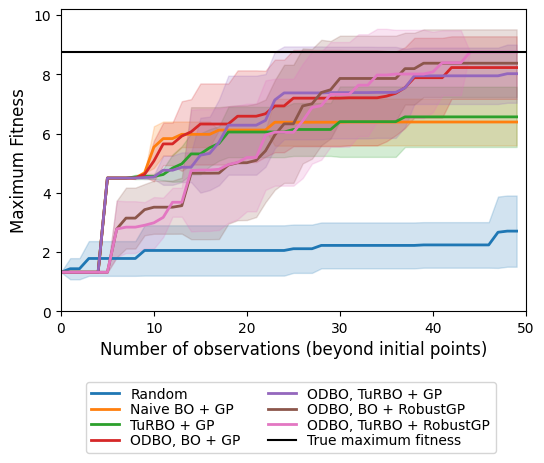

In [38]:
# Plotting results
fig = plt.figure(figsize=(6, 4), dpi=100)
odbo.plot.plot_bo(iters=50, BO_result=Random_Y, method=methods[0], color = 'C0')
odbo.plot.plot_bo(iters=50, BO_result=BO_GP_bacth1_Y, method=methods[1], color = 'C1')
odbo.plot.plot_bo(iters=50, BO_result=TuRBO_GP_bacth1_Y, method=methods[2], color = 'C2')
odbo.plot.plot_bo(iters=50, BO_result=ODBO_GP_bacth1_Y, method=methods[3], color = 'C3')
odbo.plot.plot_bo(iters=50, BO_result=ODTuRBO_GP_bacth1_Y, method=methods[4], color = 'C4')
odbo.plot.plot_bo(iters=50, BO_result=ODBO_RobustGP_bacth1_Y, method=methods[5], color = 'C5')
odbo.plot.plot_bo(iters=50, BO_result=ODTuRBO_RobustGP_bacth1_Y, method=methods[6], color = 'C6')
plt.plot([0,50], [max(Y_test), max(Y_test)], label='True maximum fitness', color = 'k')
plt.xlabel('Number of observations (beyond initial points)', fontsize=12)
plt.legend(bbox_to_anchor=(0.0, -0.21, 0.95, 0.0),labelspacing=0.1, ncol=2)
plt.ylim([0, 10.2])
plt.xlim([0, 50])
plt.ylabel('Maximum Fitness', fontsize=12)
plt.savefig('results/GB1_2016/GB1_2016_opt_curves.png')
plt.show()


## Count Avg top hit number

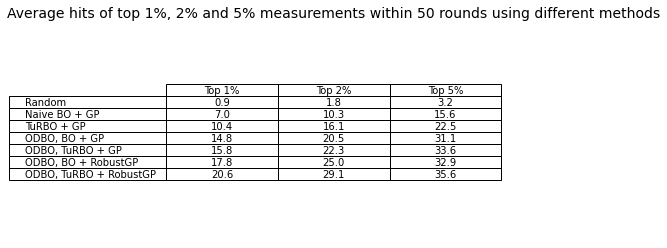

In [39]:
fitness_top = Y_test[np.argsort(Y_test)[-int(0.01*len(Y_test))]]
num_Random_Y, num_BO_GP_bacth1_Y, num_TuRBO_GP_bacth1_Y, num_ODBO_GP_bacth1_Y, num_ODTuRBO_GP_bacth1_Y, \
     num_ODBO_RobustGP_bacth1_Y, num_ODTuRBO_RobustGP_bacth1_Y = [],[],[],[],[],[],[]
fitness_labels = ['Top 1%', 'Top 2%', 'Top 5%']

for i in [0.01, 0.02, 0.05]:
    fitness_top = Y_test[np.argsort(Y_test)[-int(i*len(Y_test))]]
    num_Random_Y.append(len(np.where(Random_Y[40:, :].ravel()>=fitness_top)[0])/10)
    num_BO_GP_bacth1_Y.append(len(np.where(BO_GP_bacth1_Y[40:, :].ravel()>=fitness_top)[0])/10)
    num_TuRBO_GP_bacth1_Y.append(len(np.where(TuRBO_GP_bacth1_Y[40:, :].ravel()>=fitness_top)[0])/10)
    num_ODBO_GP_bacth1_Y.append(len(np.where(ODBO_GP_bacth1_Y[40:, :].ravel()>=fitness_top)[0])/10)
    num_ODTuRBO_GP_bacth1_Y.append(len(np.where(ODTuRBO_GP_bacth1_Y[40:, :].ravel()>=fitness_top)[0])/10)
    num_ODBO_RobustGP_bacth1_Y.append(len(np.where(ODBO_RobustGP_bacth1_Y[40:, :].ravel()>=fitness_top)[0])/10)
    num_ODTuRBO_RobustGP_bacth1_Y.append(len(np.where(ODTuRBO_RobustGP_bacth1_Y[40:, :].ravel()>=fitness_top)[0])/10)
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

cell_text = [num_Random_Y, num_BO_GP_bacth1_Y, num_TuRBO_GP_bacth1_Y, num_ODBO_GP_bacth1_Y, num_ODTuRBO_GP_bacth1_Y, \
     num_ODBO_RobustGP_bacth1_Y, num_ODTuRBO_RobustGP_bacth1_Y]
ax.table(cellText=cell_text,
         rowLabels=methods,
         colLabels=fitness_labels,
         cellLoc='center',
         colLoc='center',
         loc = 'center',
         fontsize =14)
plt.title('Average hits of top 1%, 2% and 5% measurements within 50 rounds using different methods', fontsize=14, loc = 'center')
plt.show()
